In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
data = pd.read_csv('data_steam.csv')

In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30178 entries, 0 to 30177
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30178 non-null  object 
 1   user_id             30178 non-null  object 
 2   item_id             30178 non-null  int64  
 3   title               30178 non-null  object 
 4   genre               30178 non-null  object 
 5   developer           30178 non-null  object 
 6   release_date        30178 non-null  float64
 7   price               30178 non-null  float64
 8   recommend           30178 non-null  int64  
 9   year_posted         30178 non-null  int64  
 10  sentiment_analysis  30178 non-null  int64  
 11  playtime_forever    30178 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.8+ MB


In [6]:

data

,id,user_id,item_id,title,genre,developer,release_date,price,recommend,year_posted,sentiment_analysis,playtime_forever
0,7656119797098247922200,76561197970982479,22200,Zeno Clash,Action,ACE Team,2009.0,9.99,1,2011,2,271
1,765611979709824791250,76561197970982479,1250,Killing Floor,Action,Tripwire Interactive,2009.0,19.99,1,2011,2,10006
2,js41637227300,js41637,227300,Euro Truck Simulator 2,Indie,SCS Software,2013.0,19.99,1,2013,1,551
3,js41637239030,js41637,239030,"Papers, Please",Adventure,3909,2013.0,9.99,1,2013,1,349
4,evcentric107200,evcentric,107200,Space Pirates and Zombies,Action,MinMax Games Ltd.,2011.0,9.99,1,2014,2,3225
...,...,...,...,...,...,...,...,...,...,...,...,...
30173,76561198239215706730,76561198239215706,730,Counter-Strike: Global Offensive,Action,Valve,2012.0,14.99,1,2015,1,4659
30174,wayfeng730,wayfeng,730,Counter-Strike: Global Offensive,Action,Valve,2012.0,14.99,1,2015,1,42740
30175,76561198251004808253980,76561198251004808,253980,Enclave,RPG,Starbreeze,2003.0,4.99,1,2015,2,1098
30176,72947282842730,72947282842,730,Counter-Strike: Global Offensive,Action,Valve,2012.0,14.99,1,2015,0,33



El conjunto de datos tiene un tamaño de alrededor de 2.8 MB, lo que nos permite almacenarlo cómodamente en nuestra máquina. Incluye información general sobre juegos de una base de datos de STEAM y consta de 7 características numéricas y 5 características categóricas, algunas de las cuales necesitarán ajustes.

In [7]:
data['item_id'] = data['item_id'].astype(str)
data['release_date'] = data['release_date'].astype(int)

y de esta manera el dataset queda con 6 características de tipo numérico y 6 de tipo categórico

In [8]:
# descripcion de variables numericas
data.describe()

,release_date,price,recommend,year_posted,sentiment_analysis,playtime_forever
count,30178.000000,30178.000000,30178.000000,30178.000000,30178.000000,30178.000000
mean,2012.059083,15.226117,0.912453,2014.187222,1.320034,9836.766784
std,3.141860,13.767891,0.282640,0.825100,0.694448,23190.394179
min,1989.000000,0.000000,0.000000,2010.000000,0.000000,1.000000
25%,2011.000000,9.990000,1.000000,2014.000000,1.000000,457.000000
50%,2013.000000,14.990000,1.000000,2014.000000,1.000000,1682.000000
75%,2014.000000,19.990000,1.000000,2015.000000,2.000000,7320.750000
max,2017.000000,771.710000,1.000000,2015.000000,2.000000,642773.000000


In [9]:
# descripcion de variables categoricas
data['id'].value_counts()
    # un identificador unico para cada user que jugó duferentes juegos

id
7656119797098247922200     1
76561198036168976107100    1
765611980836090314000      1
76561198085240724211820    1
smith19128190              1
                          ..
ceruleansketchcat203160    1
NikkiRox330830             1
ungstein214950             1
ungstein12120              1
ApxLGhost730               1
Name: count, Length: 30178, dtype: int64

In [10]:
data['user_id'].value_counts()


user_id
76561198060201321    10
Findoogle            10
76561198080345478    10
emorisu              10
frozout              10
                     ..
SiteYouAreEll         1
76561198070917100     1
76561198027724520     1
ChronicHazard         1
ApxLGhost             1
Name: count, Length: 15942, dtype: int64

In [11]:
data['item_id'].value_counts()

item_id
730       2707
4000      1392
304930     797
550        619
221100     601
          ... 
3710         1
211280       1
412470       1
321030       1
307130       1
Name: count, Length: 1995, dtype: int64

In [12]:
data['title'].value_counts()

title
Counter-Strike: Global Offensive    2707
Garry's Mod                         1392
Unturned                             797
Left 4 Dead 2                        619
DayZ                                 601
                                    ... 
Judge Dredd: Dredd vs. Death           1
Primal Fears                           1
Metal War Online: Retribution          1
One Day For Ched                       1
Asteria                                1
Name: count, Length: 1995, dtype: int64

In [13]:
data['developer'].value_counts()

developer
Valve                           4297
Facepunch Studios               1982
Bohemia Interactive              904
Smartly Dressed Games            797
Re-Logic                         594
                                ... 
Edmund McMillen,Tyler Glaiel       1
Level Up Labs, LLC                 1
Sigma Team Inc.                    1
Days of Wonder                     1
Legend Studio                      1
Name: count, Length: 1470, dtype: int64

In [14]:
data['genre'].value_counts()

genre
Action                       21982
Indie                         3001
Adventure                     1898
Strategy                       940
Casual                         882
RPG                            570
Simulation                     338
Free to Play                   320
Racing                         176
Massively Multiplayer           28
Animation &amp; Modeling        13
Sports                          10
Utilities                        9
Design &amp; Illustration        8
Audio Production                 2
Video Production                 1
Name: count, dtype: int64

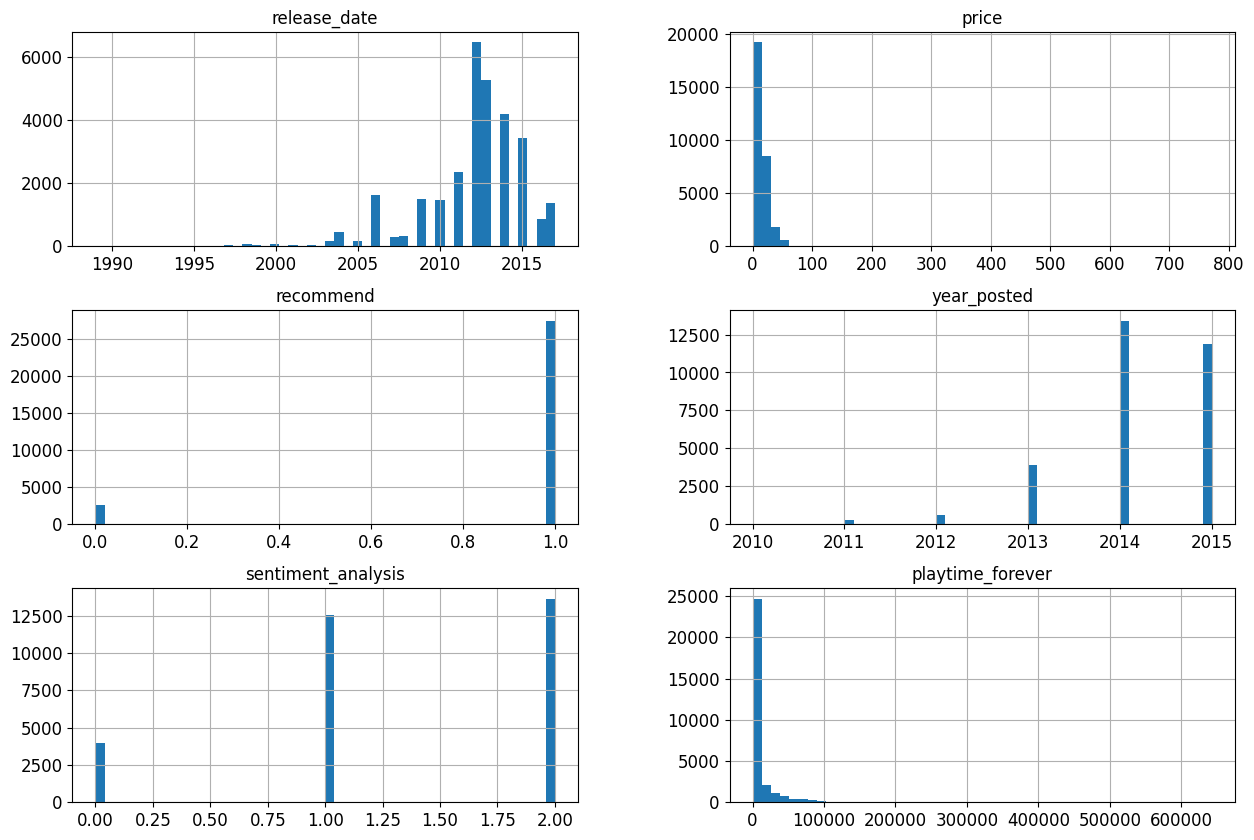

In [15]:
data.hist(bins=50, figsize=(15,10))
plt.show()


Según la descripción estadística y los gráficos generados para las variables numéricas, se identifican valores atípicos en las siguientes variables: 'release_date', 'price' y 'playtime_forever'. Se recomienda eliminar estos valores atípicos para evitar que afecten el modelo que se tiene previsto ejecutar.


In [16]:
"""
data1 = data['release_date']
data2 = data['price']
data3 = data['playtime_forever']
"""

"\ndata1 = data['release_date']\ndata2 = data['price']\ndata3 = data['playtime_forever']\n"

In [19]:
"""
# Calcula el rango intercuartil (IQR) para cada variable
Q1_1 = data1.quantile(0.25)
Q3_1 = data1.quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2.quantile(0.25)
Q3_2 = data2.quantile(0.75)
IQR_2 = Q3_2 - Q1_2

Q1_3 = data3.quantile(0.25)
Q3_3 = data3.quantile(0.75)
IQR_3 = Q3_3 - Q1_3

print('release_date:','Q1:', Q1_1,'Q3:', Q3_1,'IQR:', IQR_1)
print('price:','Q1:', Q1_2,'Q3:', Q3_2,'IQR:', IQR_2)
print('playtime_forever:','Q1:', Q1_3,'Q3:', Q3_3,'IQR:', IQR_3)
"""

"\n# Calcula el rango intercuartil (IQR) para cada variable\nQ1_1 = data1.quantile(0.25)\nQ3_1 = data1.quantile(0.75)\nIQR_1 = Q3_1 - Q1_1\n\nQ1_2 = data2.quantile(0.25)\nQ3_2 = data2.quantile(0.75)\nIQR_2 = Q3_2 - Q1_2\n\nQ1_3 = data3.quantile(0.25)\nQ3_3 = data3.quantile(0.75)\nIQR_3 = Q3_3 - Q1_3\n\nprint('release_date:','Q1:', Q1_1,'Q3:', Q3_1,'IQR:', IQR_1)\nprint('price:','Q1:', Q1_2,'Q3:', Q3_2,'IQR:', IQR_2)\nprint('playtime_forever:','Q1:', Q1_3,'Q3:', Q3_3,'IQR:', IQR_3)\n"

In [20]:
"""
# Define los límites inferior y superior para cada variable
lower_bound1 = round(Q1_1 - 1.5 * IQR_1)
upper_bound1 = round(Q3_1 + 1.5 * IQR_1)

#lower_bound2 = round(Q1_2 - 1.5 * IQR_2) # si resulta un valor negativo se condera = 0
lower_bound2 = 0
upper_bound2 = round(Q3_2 + 1.5 * IQR_2)

#lower_bound3 = round(Q1_3 - 1.5 * IQR_3) # si resulta un valor negativo se condera = 1
lower_bound3 = 1
upper_bound3 = round(Q3_3 + 1.5 * IQR_3)

print('release_date: lower_bound:', lower_bound1, 'upper_bound:', upper_bound1)
print('price: lower_bound:', lower_bound2, 'upper_bound:', upper_bound2)
print('playtime_forever: lower_bound:', lower_bound3, 'upper_bound:', upper_bound3)
"""

"\n# Define los límites inferior y superior para cada variable\nlower_bound1 = round(Q1_1 - 1.5 * IQR_1)\nupper_bound1 = round(Q3_1 + 1.5 * IQR_1)\n\n#lower_bound2 = round(Q1_2 - 1.5 * IQR_2) # si resulta un valor negativo se condera = 0\nlower_bound2 = 0\nupper_bound2 = round(Q3_2 + 1.5 * IQR_2)\n\n#lower_bound3 = round(Q1_3 - 1.5 * IQR_3) # si resulta un valor negativo se condera = 1\nlower_bound3 = 1\nupper_bound3 = round(Q3_3 + 1.5 * IQR_3)\n\nprint('release_date: lower_bound:', lower_bound1, 'upper_bound:', upper_bound1)\nprint('price: lower_bound:', lower_bound2, 'upper_bound:', upper_bound2)\nprint('playtime_forever: lower_bound:', lower_bound3, 'upper_bound:', upper_bound3)\n"

In [21]:
"""
# Elimina los outliers de las variables mencionadas

data = data[(data['release_date'] >= lower_bound1) & (data['release_date'] <= upper_bound1)]
data = data[(data['price'] >= lower_bound2) & (data['price'] <= upper_bound2)]
data = data[(data['playtime_forever'] >= lower_bound3) & (data['playtime_forever'] <= upper_bound3)]
"""

"\n# Elimina los outliers de las variables mencionadas\n\ndata = data[(data['release_date'] >= lower_bound1) & (data['release_date'] <= upper_bound1)]\ndata = data[(data['price'] >= lower_bound2) & (data['price'] <= upper_bound2)]\ndata = data[(data['playtime_forever'] >= lower_bound3) & (data['playtime_forever'] <= upper_bound3)]\n"

In [ ]:
# data.to_csv('data_steam.csv', index=False)

In [22]:
# transformar etiquetas categóricas a valores numéricos

le = preprocessing.LabelEncoder()

data['user_id1'] = le.fit_transform(data['user_id'].copy())    
data['item_id1'] = le.fit_transform(data['item_id'].copy())
data['genre1'] = le.fit_transform(data['genre'].copy())
data['developer1'] = le.fit_transform(data['developer'].copy())
data['title1'] = le.fit_transform(data['title'].copy())

In [23]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30178 entries, 0 to 30177
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30178 non-null  object 
 1   user_id             30178 non-null  object 
 2   item_id             30178 non-null  object 
 3   title               30178 non-null  object 
 4   genre               30178 non-null  object 
 5   developer           30178 non-null  object 
 6   release_date        30178 non-null  int32  
 7   price               30178 non-null  float64
 8   recommend           30178 non-null  int64  
 9   year_posted         30178 non-null  int64  
 10  sentiment_analysis  30178 non-null  int64  
 11  playtime_forever    30178 non-null  int64  
 12  user_id1            30178 non-null  int32  
 13  item_id1            30178 non-null  int32  
 14  genre1              30178 non-null  int32  
 15  developer1          30178 non-null  int32  
 16  titl

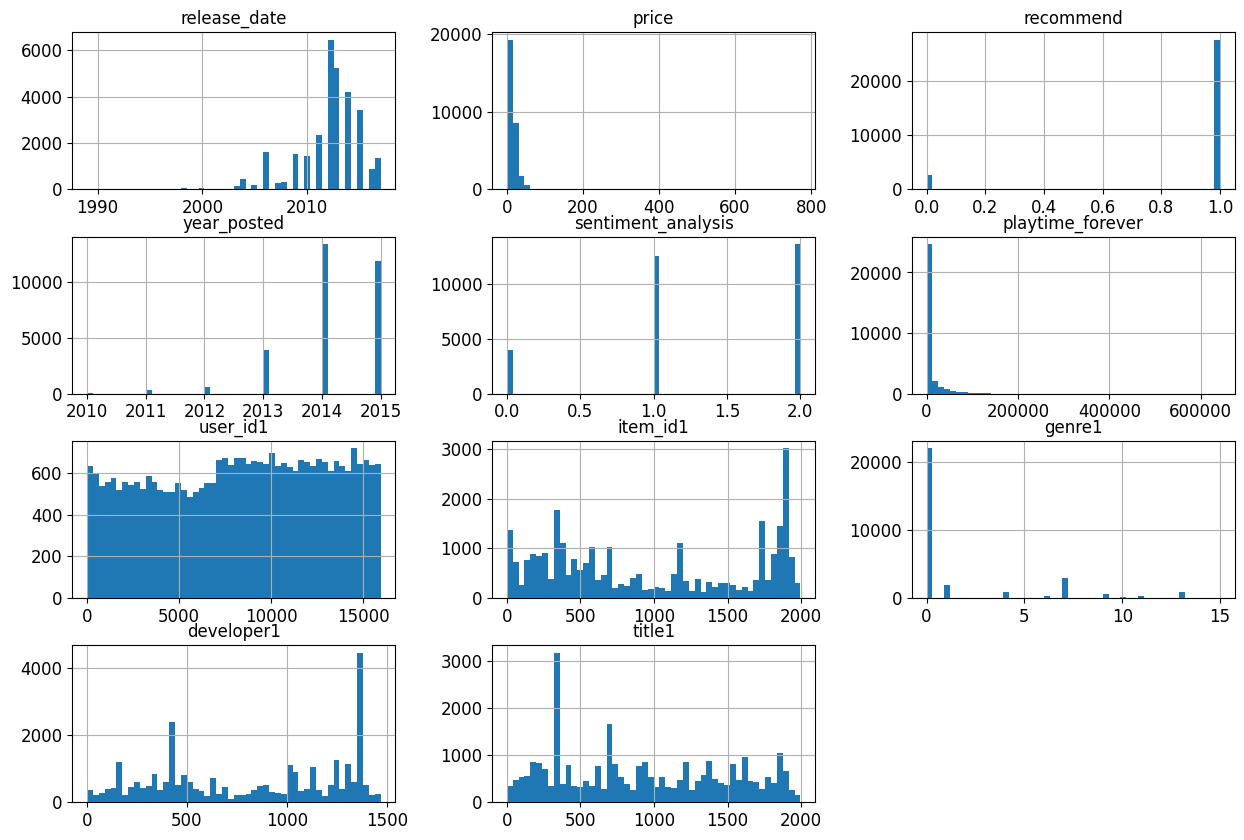

In [24]:
data.hist(bins=50, figsize=(15,10))
plt.show()


Después de la eliminación de los valores atípicos, se observa una distribución más representativa con diversos comportamientos. Además, se ha incorporado la variable 'genre' después de mapear sus valores

In [25]:
data = data[['genre1', 'title1', 'developer1','release_date','price','recommend','year_posted','sentiment_analysis','playtime_forever','user_id1','item_id1']]


In [26]:
corr_matrix = data.corr()
corr_matrix['item_id1'].sort_values(ascending=False)

item_id1              1.000000
playtime_forever      0.246163
developer1            0.184154
genre1                0.103233
year_posted           0.093676
recommend             0.036197
user_id1              0.016794
sentiment_analysis    0.001271
price                -0.041093
release_date         -0.138728
title1               -0.167358
Name: item_id1, dtype: float64

In [27]:

data.corr()

,genre1,title1,developer1,release_date,price,recommend,year_posted,sentiment_analysis,playtime_forever,user_id1,item_id1
genre1,1.000000,0.036853,-0.174037,-0.193738,0.087694,0.016155,-0.028839,0.011411,0.011069,-0.019219,0.103233
title1,0.036853,1.000000,-0.067944,0.115158,-0.189018,0.020055,-0.035228,0.005887,-0.163333,-0.004247,-0.167358
developer1,-0.174037,-0.067944,1.000000,-0.044403,-0.022054,0.029080,0.018555,0.000737,0.124416,0.018407,0.184154
release_date,-0.193738,0.115158,-0.044403,1.000000,0.061048,-0.077093,0.263318,-0.027363,-0.114866,-0.023700,-0.138728
price,0.087694,-0.189018,-0.022054,0.061048,1.000000,-0.023277,0.015984,0.007876,0.011040,-0.030294,-0.041093
recommend,0.016155,0.020055,0.029080,-0.077093,-0.023277,1.000000,-0.108897,0.237465,0.057845,0.011313,0.036197
year_posted,-0.028839,-0.035228,0.018555,0.263318,0.015984,-0.108897,1.000000,-0.077913,0.030515,-0.029616,0.093676
sentiment_analysis,0.011411,0.005887,0.000737,-0.027363,0.007876,0.237465,-0.077913,1.000000,0.018043,-0.004692,0.001271
playtime_forever,0.011069,-0.163333,0.124416,-0.114866,0.011040,0.057845,0.030515,0.018043,1.000000,0.008210,0.246163
user_id1,-0.019219,-0.004247,0.018407,-0.023700,-0.030294,0.011313,-0.029616,-0.004692,0.008210,1.000000,0.016794


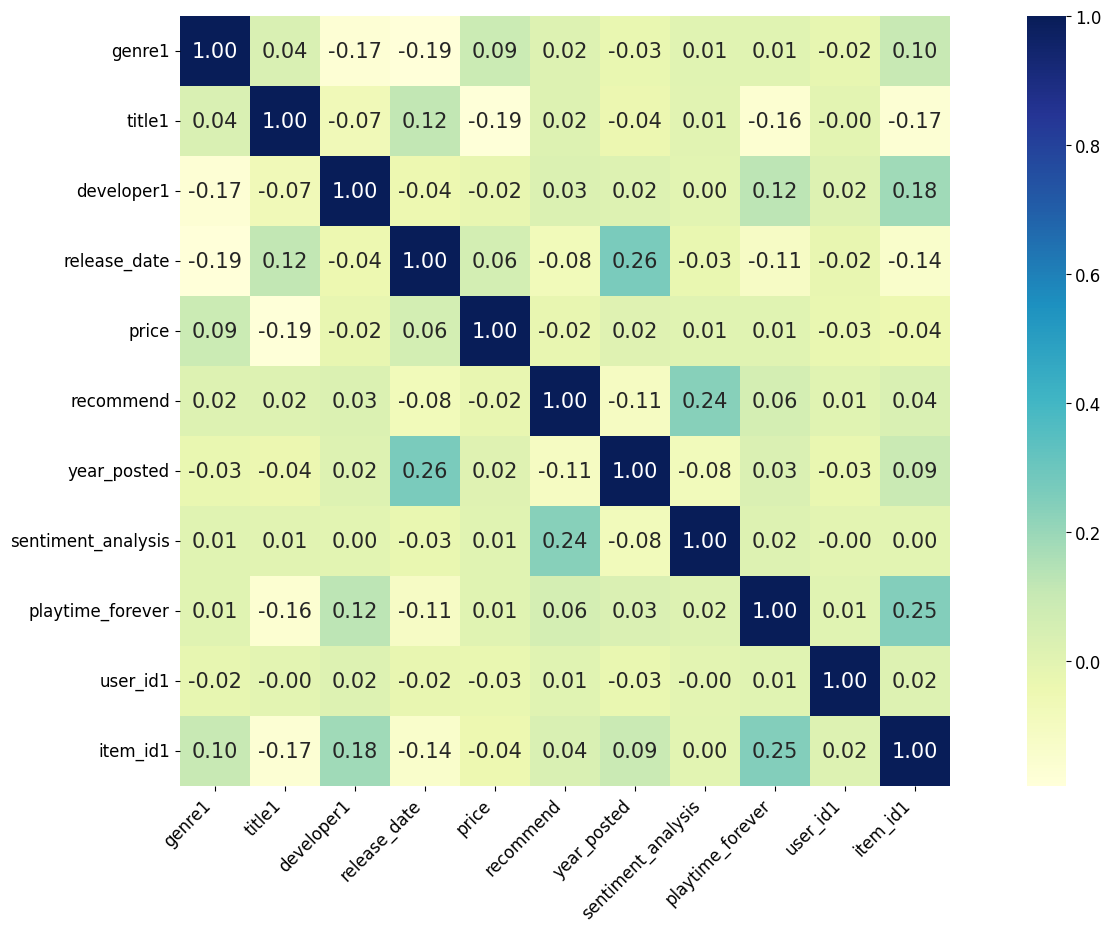

In [28]:
# Hacemos un mapa de calor para ver la relación entre las variables de una manera más amena

plt.figure(figsize=(20, 10))

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={"size": 15}, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()


Según el gráfico, se aprecia que a medida que el número de 'item_id' aumenta, hay una preferencia por jugar más horas. También se destaca una concentración de usuarios que favorecen precios más bajos. Además, parece evidente que hay un género de juego que es el favorito de la mayoría de los usuarios.

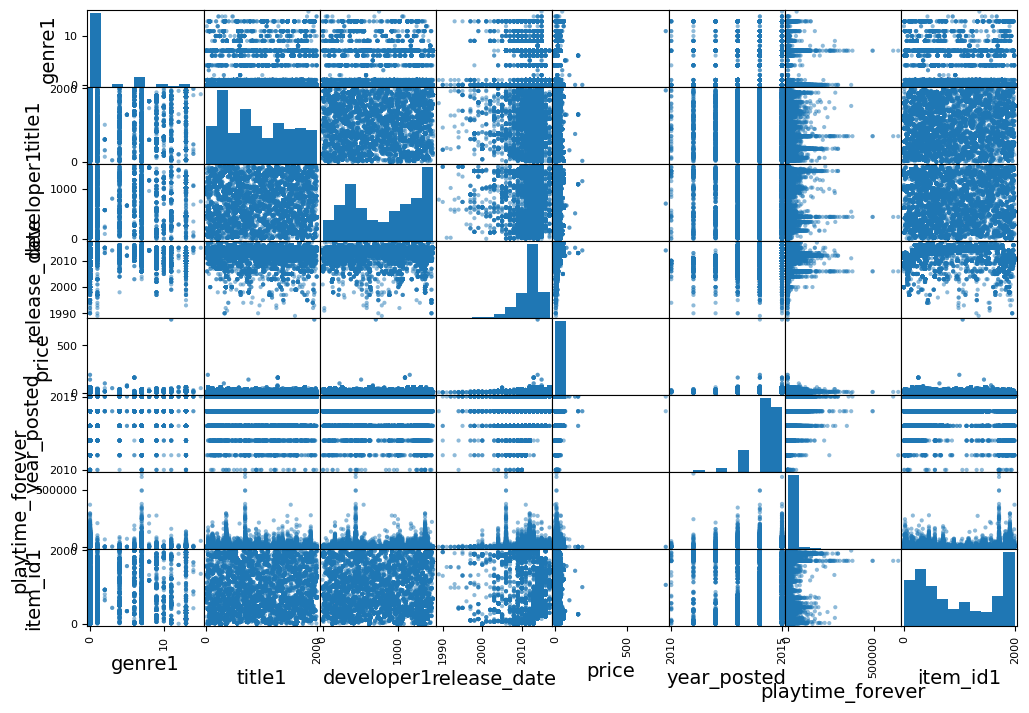

In [29]:
from pandas.plotting import scatter_matrix

attributes = ['genre1','title1','developer1','release_date','price','year_posted','playtime_forever','item_id1']
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()


In [30]:
# seleccion de variables por informacion mutua

X = data.iloc[:, :-1].values # Variables independientes
y = data.iloc[:, -1].values # Variable dependiente (la que queremos predecir)

sel = SelectKBest(mutual_info_classif, k=4)
data_redu = sel.fit_transform(X, y)
data_redu.shape

columnas = sel.get_support(indices=True)
columnas_sel = data.iloc[:,columnas].columns.tolist()
columnas_sel

# muestra la cantidad de variables (k) que son mas correlacionadas con la variable objetivo 

['title1', 'developer1', 'release_date', 'price']